# Численное решение уравнения переноса

<span style="font-style:normal; font-size:14pt;">
$$
\begin{cases}
u_{t} + \frac{\partial}{\partial{x}}f(u) = 0, \ \ \ \ 0 < x < l, \ \ \ 0 < t,  \\
u(0,t) = u(l,t) = 0,                                                           \\
u(x,0) = \varphi(x),                                                           \\ 
\end{cases}
$$

> <span style="font-style:normal; font-size:12pt;"> 
    Используя разностную схему Лакса-Фридрихса, в области x ∈ [0,10]:
        <ol> 
            <li> Рассмотреть линейный перенос прямоугольного профиля;</li>
            <li> Рассмотреть нелинейный перенос с разрывным решением (с опрокидыванием волны);</li>
            <li> Придумать комбинацию интересных начальных данных phi(x) и скорости переноса a(u) (чтобы можно было найти соответствующий интеграл f(u)). Условимся, что |phi(x)|<=1 и |a(u)|<=1 </li>
        </ol> 

<span style="font-style:normal; font-size:12pt;">
    <ul> 
        <li> Линейный перенос прямоугольного профиля: </li>
        <p>
$$
\begin{equation}
\varphi(x) = \eta(x-1)\eta(2-x), \ \ \ a=const, \ \ \   \\
\end{equation}
$$
        </p>        
        <li> Нелинейные перенос с разрывным решением (с опрокидыванием волны):</li>
        <p>
$$
\begin{equation}
\varphi(x) = sin^{2}(\frac{\pi x}{2}) \eta(x) \eta(2-x), \ \ \ a(u)=u, \ \ \ \\
\end{equation}
$$
        </p>
        <p>где η(x) - функция Хевисайда </p>
    </ul> 
    

In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
from matplotlib.widgets   import Slider, Button
from matplotlib           import cm
import numpy as np

# from ipywidgets import interact, IntSlider, FloatSlider, fixed, FloatSlider

In [2]:
# условие устойчивости Куранта
def Kurant_condition(layer, h, a, c=0.9):
    
    a_max = max([a(u) for u in layer])
    t = c * h / a_max

    return t


def solve_eq(left, right, h, t0, T, 
             a, f, psi, chi, phi):
    
    u_plot = []
    x_plot = np.linspace(left, right, round((right - left) / h) + 1)
    t_plot = [t0]
    
    # нулевой слой из начального условия
    layer_0 = [phi(x) for x in x_plot]
    u_plot.append(layer_0)    
    
    
    t_cur   = t0          # текущее время
    layer_i = layer_0     
    
    while t_cur < T:
        
        layer = []        # вычисляемый слой
    
        # переменный шаг
        t = Kurant_condition(layer_0, h, a)
        
        if t_cur + t <= T:
            t_cur += t
            t_plot.append(t_cur)
        else:
            break

        
        u_n0 = psi(t_cur)
        layer.append(u_n0)

        for k in range(1, len(x_plot) - 1):
            u_nk = (1/2 * (layer_i[k + 1] + layer_i[k - 1]) - 
                    t / (2 * h) * (f(layer_i[k + 1]) - f(layer_i[k - 1])))

            layer.append(u_nk)

        u_nN = chi(t_cur)
        layer.append(u_nN)

        
        u_plot.append(layer)
        layer_i = layer
        
    return x_plot, t_plot, u_plot 

In [3]:
# Построение графика и сохранение в директорию
def graph(x_plot, u_plot, t_index, title, path):
    
    props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)
    
    fig, ax = plt.subplots()
    line    = plt.plot(x_plot, u_plot[t_index], lw = 2, color = 'orange')

    plt.text(8.8, 1, "T = {0:.2f}".format(t_plot[t_index]), fontsize = 8, bbox=props)

    plt.xlim(0, 10.1)
    plt.ylim(-0.01, 1.1)
    
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title(title, fontsize=9)
    
    plt.savefig(path + f"T={t_plot[t_index]:.2f}.jpg")

## Постановка задачи

In [4]:
# ЛИНЕЙНАЯ ЗАДАЧА

# скорость возмущения
def a1(u=1):
    return 1

def f1(u):
    return a1() * u

# начальное условие
def phi1(x):
    if x >= 1 and x <= 2:
        return 1
    else:
        return 0



# НЕЛИНЕЙНАЯ ЗАДАЧА

# скорость возмущения
def a2(u):
    return u

def f2(u):
    return u**2 / 2

# начальное условие
def phi2(x):
    if x >= 0 and x <= 2:
        return np.sin(np.pi * x / 2)**2
    else:
        return 0

    

# граничные условия (общие)
# на левом конце
def psi(t):
    return 0

# на правом конце
def chi(t):
    return 0

## Численное решение

### 1. Линейный перенос прямоугольного профиля

In [5]:
# Область значений и шаг по x
left  = 0
right = 10
h     = 0.005

# Область значений и шаг по t
t0 = 0
T  = 10

In [6]:
x_plot, t_plot, u1_plot = solve_eq(left, right, h, t0, T, 
                                   a1, f1, psi, chi, phi1)

#### График решения

In [7]:
# Интерактивный график
def update(val):
    index = val
    
    ydata  = u1_plot[index]
    text.set_text("T={0:.2f}".format(t_plot[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()

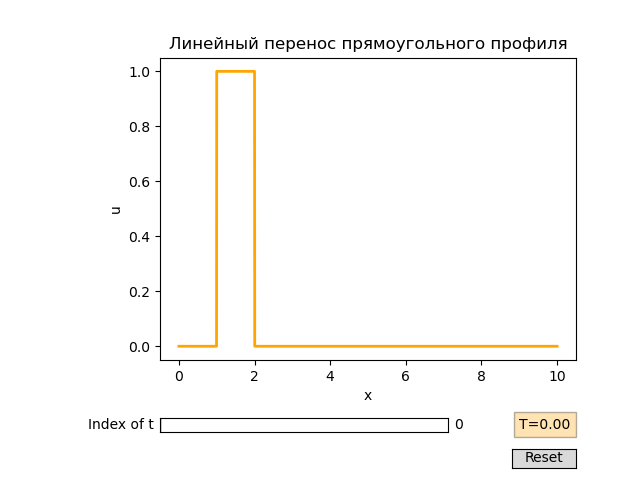

In [8]:
fig, ax = plt.subplots()
line,   = plt.plot(x_plot, u1_plot[0], lw = 2, color = 'orange')
text = plt.text(9, -0.3, "T={0:.2f}".format(t0), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

  
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(t_plot) - 1,
    valinit = t0,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)


ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Линейный перенос прямоугольного профиля')

plt.show()

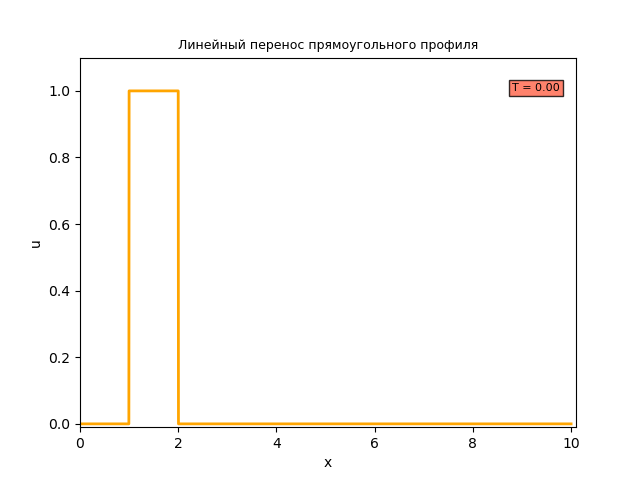

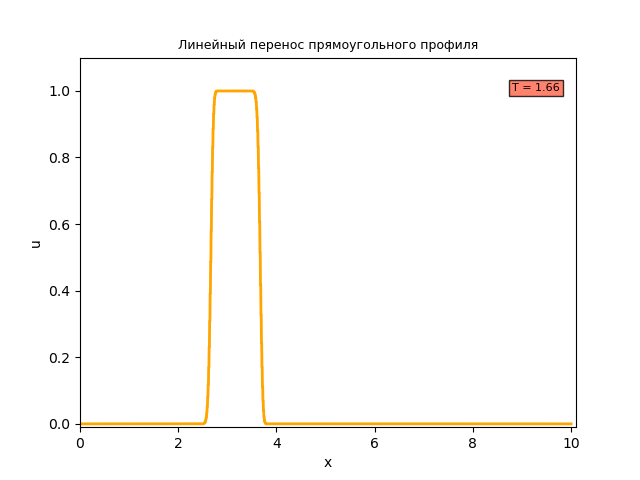

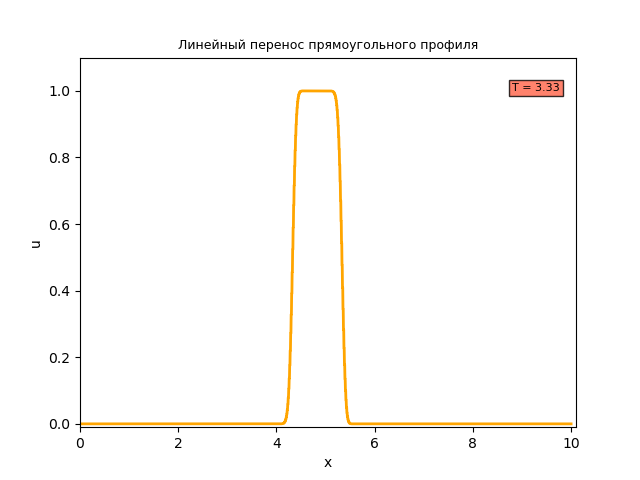

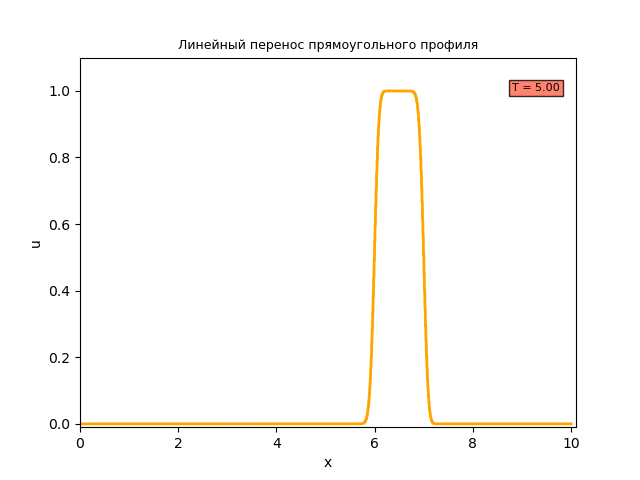

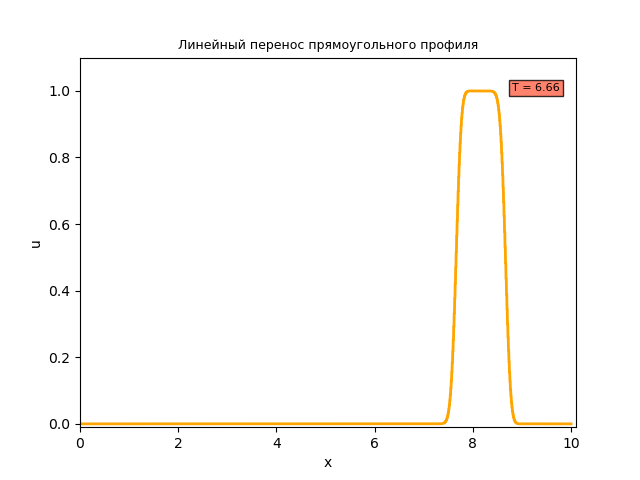

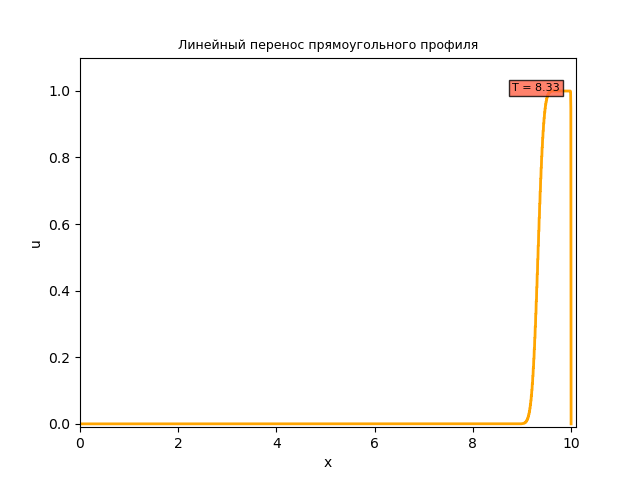

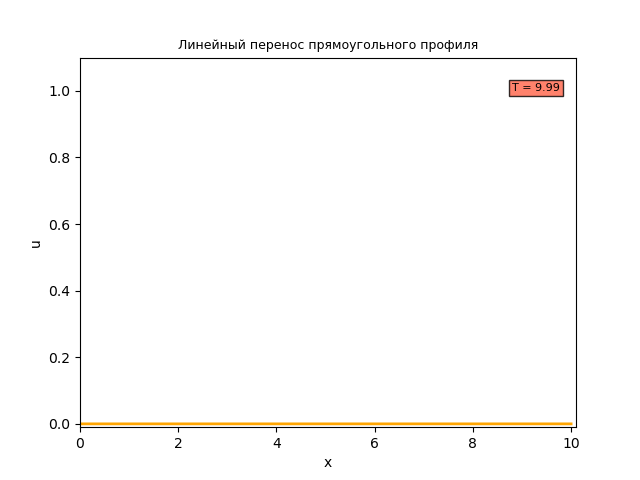

In [9]:
for i in range(0, len(t_plot), round(len(t_plot) / 6)):
    graph(x_plot, u1_plot, i, 
          title='Линейный перенос прямоугольного профиля',
          path = './Graphs/Lab10/1_')

<!-- def graph1(t_cur):
    
    index = int(t_cur / t)
    
    fig, ax = plt.subplots(figsize=(8,4))
    line,   = plt.plot(x_plot, u1_plot[index], lw = 2, color = 'orange')
    
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title('Линейный перенос прямоугольного профиля')
    
    plt.show()     -->

<!-- interact(graph1, t_cur=FloatSlider(min=t0,max=T, step=t)) -->

### 2. Нелинейные перенос с разрывным решением (с опрокидыванием волны)

In [10]:
# Область значений и шаг по x
left  = 0
right = 10
h     = 0.005

# Область значений и шаг по t
t0 = 0
T  = 100

In [11]:
x_plot, t_plot, u2_plot = solve_eq(left, right, h, t0, T, 
                                   a2, f2, psi, chi, phi2)

#### График решения

In [12]:
def update(val):
    index = val
    
    ydata  = u2_plot[index]
    text.set_text("T={0:.2f}".format(t_plot[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()

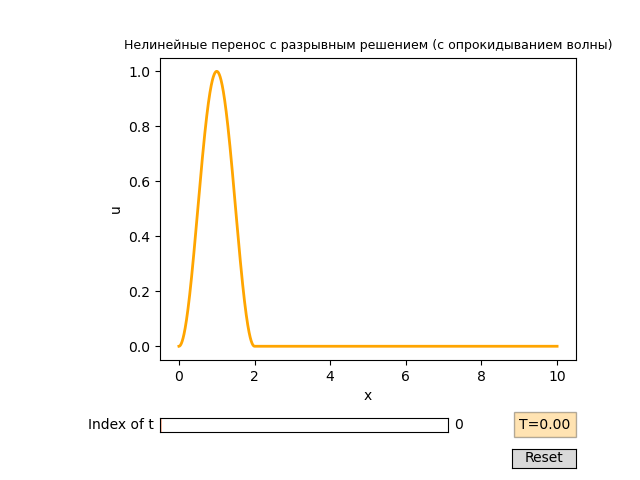

In [13]:
fig, ax = plt.subplots()
line,   = plt.plot(x_plot, u2_plot[0], lw = 2, color = 'orange')
text = plt.text(9, -0.3, "T={0:.2f}".format(t0), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

    
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(t_plot) - 1,
    valinit = t0,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)



ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Нелинейные перенос с разрывным решением (с опрокидыванием волны)', fontsize=9)

plt.show()

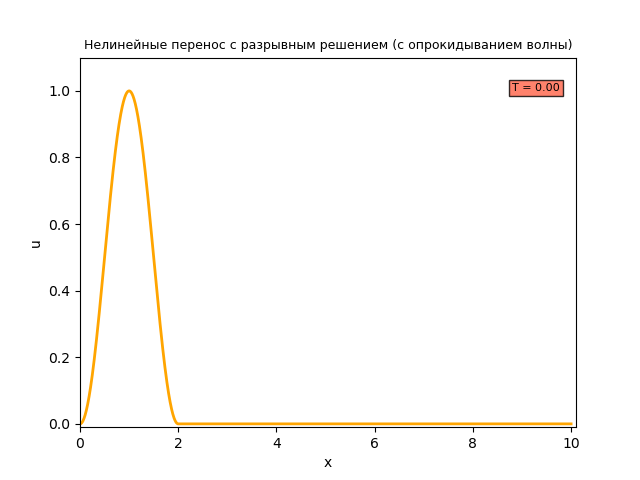

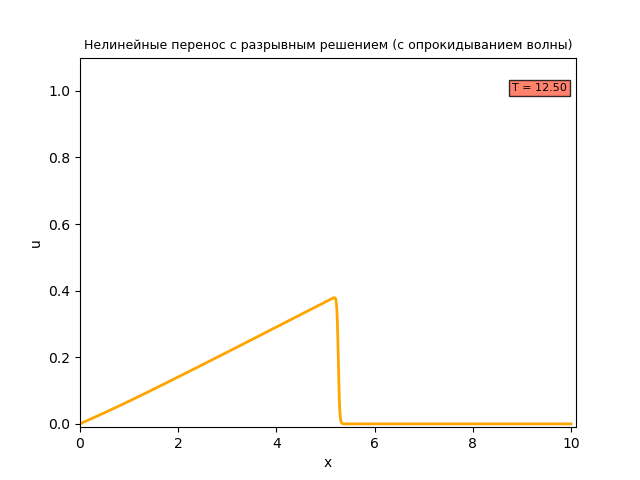

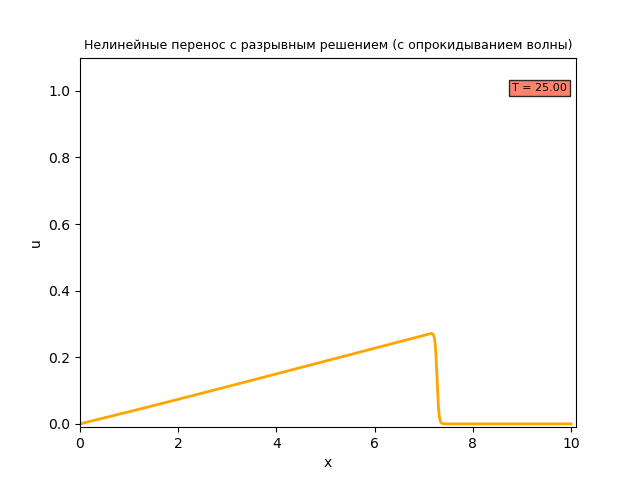

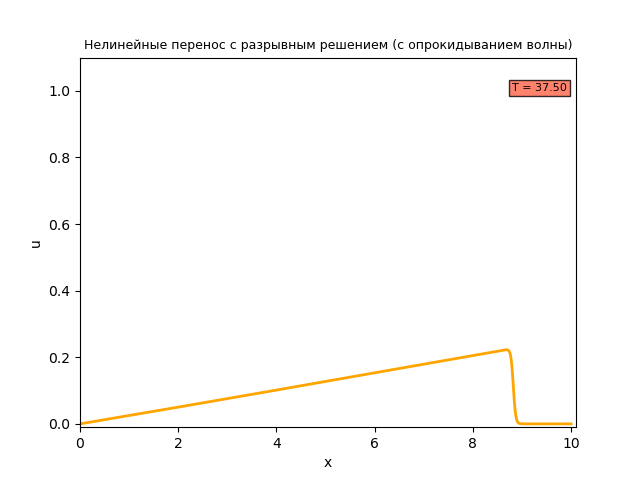

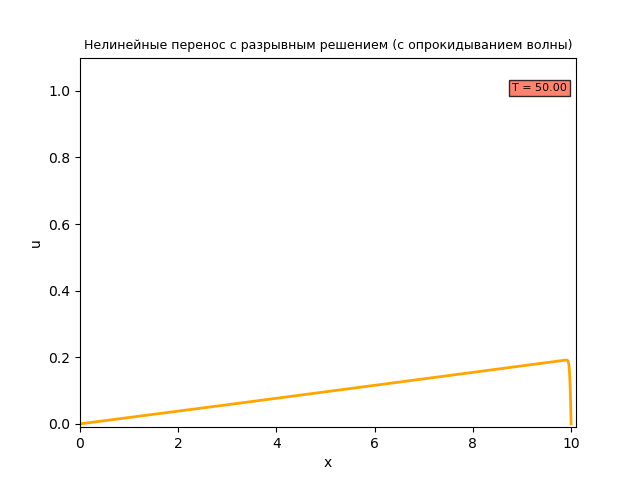

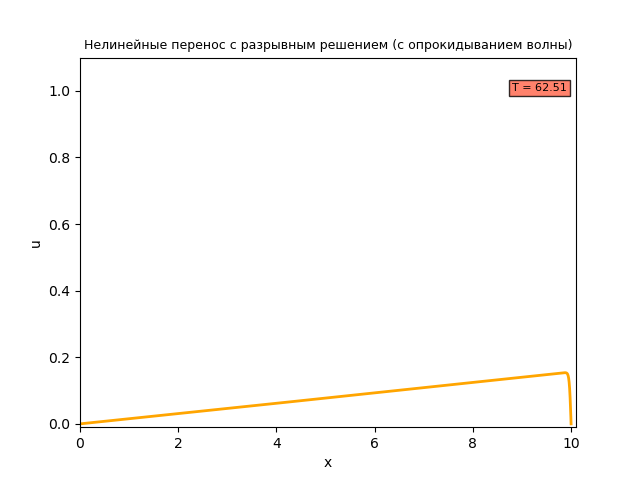

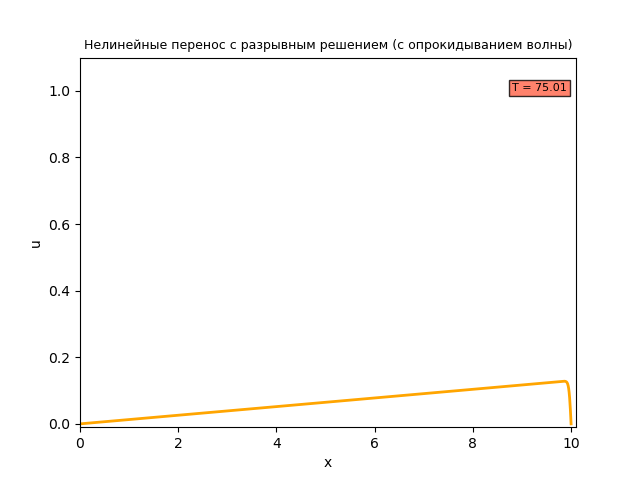

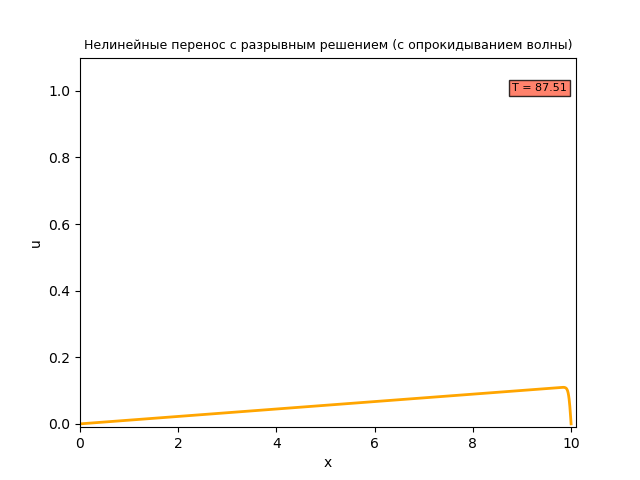

In [14]:
for i in range(0, len(t_plot), round(len(t_plot) / 8)):
    graph(x_plot, u2_plot, i, 
          title='Нелинейные перенос с разрывным решением (с опрокидыванием волны)',
          path = './Graphs/Lab10/2_')

### 3. Собственные условия

<span style="font-style:normal; font-size:12pt;">
    <p> Условия к заданию: </p>
    <p> </p>
$$
\begin{equation}
|\varphi(x)| <= 1, \\
|a(u)| <= 1        \\
\end{equation}
$$
    
<span style="font-style:normal; font-size:12pt;">
    <p> В качестве начального условия выбран гиперболический тангенс, скорость постоянная: </p>
    <p> </p>

$$
\varphi(x) =
  \begin{cases}
    \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}, & x ∈ [0, 2.5], \\
    0, & \quad  \text{иначе}                               \\
  \end{cases}   
$$
$$
a = \frac{1}{u + 1}   \\
$$

In [15]:
# скорость возмущения
def a3(u):
    return 1 / (u + 1)

def f3(u):
    return np.log(u + 1)

# начальное условие
def phi3(x):
    if x >= 0 and x <= 2.5:
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    else:
        return 0



# граничные условия
# на левом конце
def psi(t):
    return 0

# на правом конце
def chi(t):
    return 0



# Область значений и шаг по x
left  = 0
right = 10
h     = 0.005

# Область значений и шаг по t
t0 = 0
T  = 15

In [16]:
x_plot, t_plot, u3_plot = solve_eq(left, right, h, t0, T, 
                                   a3, f3, psi, chi, phi3)

#### График решения

In [17]:
def update(val):
    index = val
    
    ydata  = u3_plot[index]
    text.set_text("T={0:.2f}".format(t_plot[index]))
    
    line.set_ydata(ydata)   
    fig.canvas.draw_idle()    

def reset(event):
    time_slider.reset()

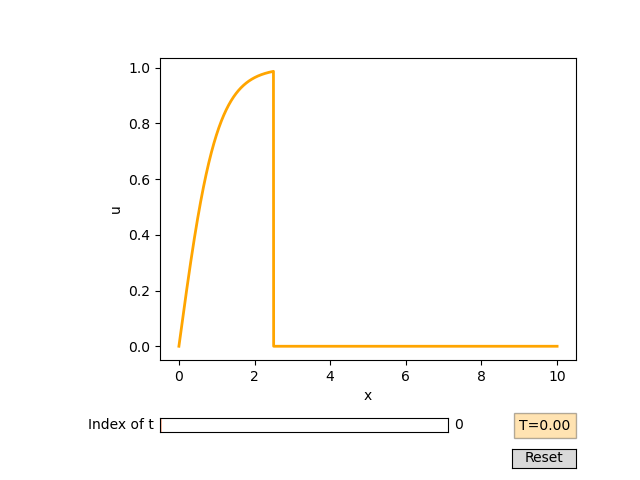

In [18]:
fig, ax = plt.subplots()
line,   = plt.plot(x_plot, u3_plot[0], lw = 2, color = 'orange')
text    = plt.text(9, -0.3, "T={0:.2f}".format(t0), fontsize=10, bbox=dict(facecolor='orange', alpha=0.3))

plt.subplots_adjust(left = 0.25, bottom = 0.25)

    
ax_time = plt.axes([0.25, 0.1, 0.45, 0.03])
time_slider = Slider(
    ax      = ax_time,
    label   = "Index of t",
    valmin  = 0,
    valmax  = len(t_plot) - 1,
    valinit = t0,
    valstep = 1,
    color   = 'orange'
)

time_slider.on_changed(update)


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button  = Button(resetax, 'Reset', hovercolor='0.975')

button.on_clicked(reset)


ax.set_xlabel('x')
ax.set_ylabel('u')

plt.show()

<ipython-input-3-6cbb67d2f39b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


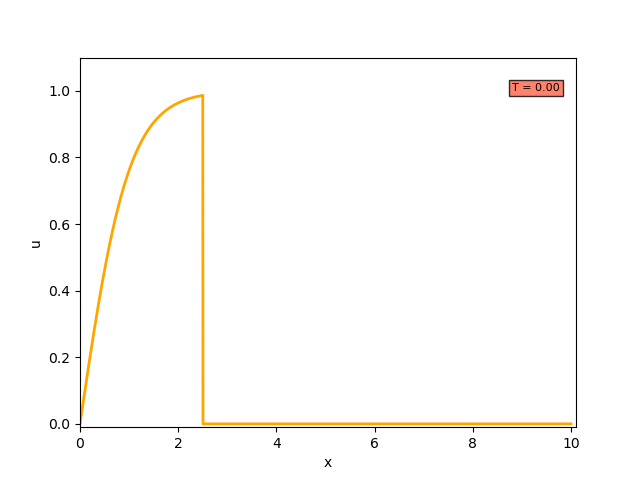

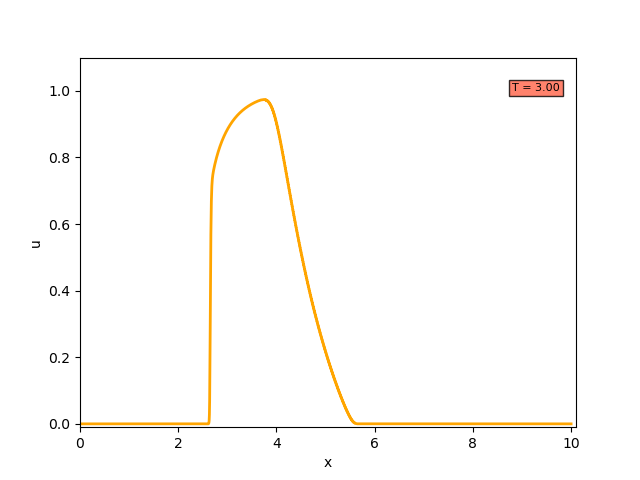

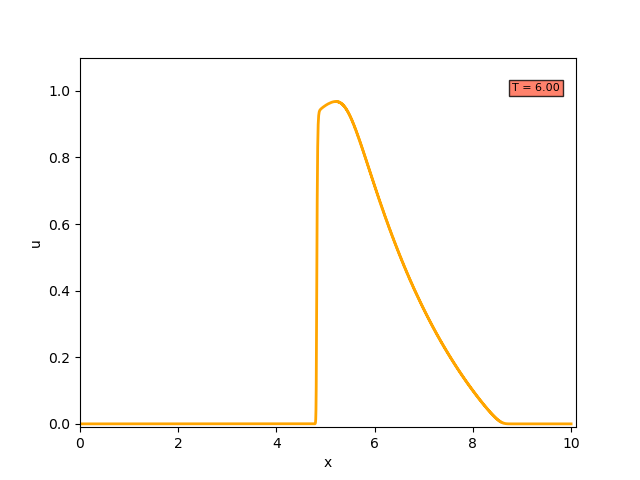

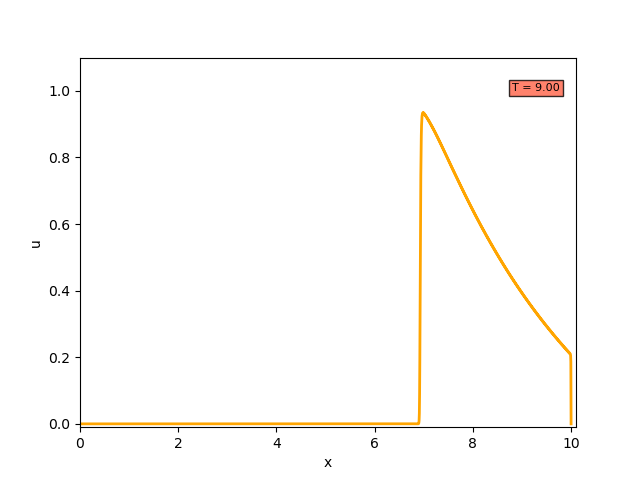

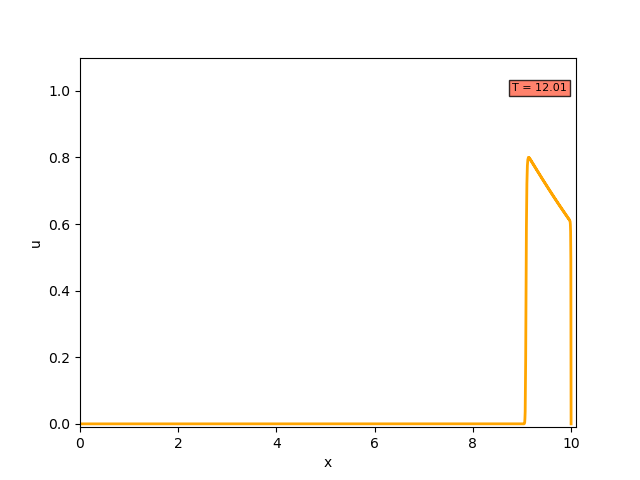

In [19]:
for i in range(0, len(t_plot), round(len(t_plot) / 5)):
    graph(x_plot, u3_plot, i, 
          title=None,
          path = './Graphs/Lab10/3_')